**Examples**

Under the Hood

How run_solve_ivp Works

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

In [44]:
import numpy as np

def slope(s, state, system):
    p, = state
    dpds = p * np.sin(s)
    return dpds

In [45]:
init = State(p=2)
system = System(init=init, t_end=5)
results, details = run_solve_ivp(system, slope)
details

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7d44e38517e0>
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0

In [46]:
results.head()

,p
0.00,2.000000
0.05,2.002501
0.10,2.010017
0.15,2.022577
0.20,2.040236


In [47]:
len(results)

101

In [48]:
def slope(s, state, system):
    p, = state
    dpds = p * np.sin(s)
    evals.append((s, p, dpds))
    return dpds
evals = []
res2, dets = run_solve_ivp(system, slope, dense_output=False)
res2

,p
0.000000,2.000000
0.000100,2.000000
0.001100,2.000001
0.011100,2.000123
0.111100,2.012369
1.111100,3.488897
2.343253,10.928986
3.363703,14.427198
4.384154,7.506056
5.000000,4.094637


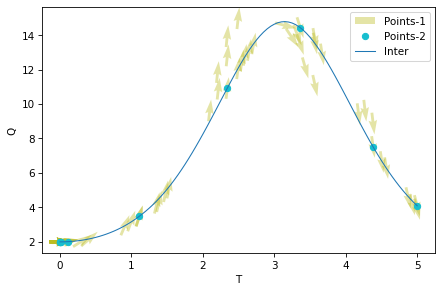

In [49]:
s, p, slope = np.transpose(evals)
theta = np.arctan(slope)
u = np.cos(theta)
v = np.sin(theta)

import matplotlib.pyplot as plt
plt.quiver(t, y, u, v, pivot='middle',
           color='C8', alpha=0.4, label='Points-1')
res2['p'].plot(style='o', color='C9', label='Points-2')
results['p'].plot(lw=1, label='Inter')

decorate(xlabel='T',
         ylabel='Q')